uni: zz2830 

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        # LeNet-5 implementation with dropout
        
        model = Sequential([
            Conv2D(6, (5, 5), padding='same', strides=1, activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(16, (5, 5), padding='valid', activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(120, (5, 5), padding='valid', activation='relu'),
            Flatten(),
            Dropout(0.3),
            Dense(84, activation='relu'),
            Dense(25, activation='softmax')]
        ) 
            
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # split into training and validation set
        # reshape each example into a 2D image (28, 28, 1)

        x_dev = images.reshape(-1, 28, 28, 1)
        x_dev = x_dev.astype('float32') / 255

        y_dev = to_categorical(labels, dtype="uint8")

        x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.2, random_state=42)
        
        self.data = {
            "train": (x_train, y_train),
            "test" : (x_val, y_val)
        }
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        X_train, y_train = self.data['train']
        X_val, y_val = self.data['test']

        history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, verbose=verbose)
        return history
    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # normalize the data in the same way as training data
        data = data.reshape(-1, 28, 28, 1)
        data = data.astype('float32') / 255

        y_pred = self.model.predict(data)
        return np.argmax(y_pred, axis=1)

    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

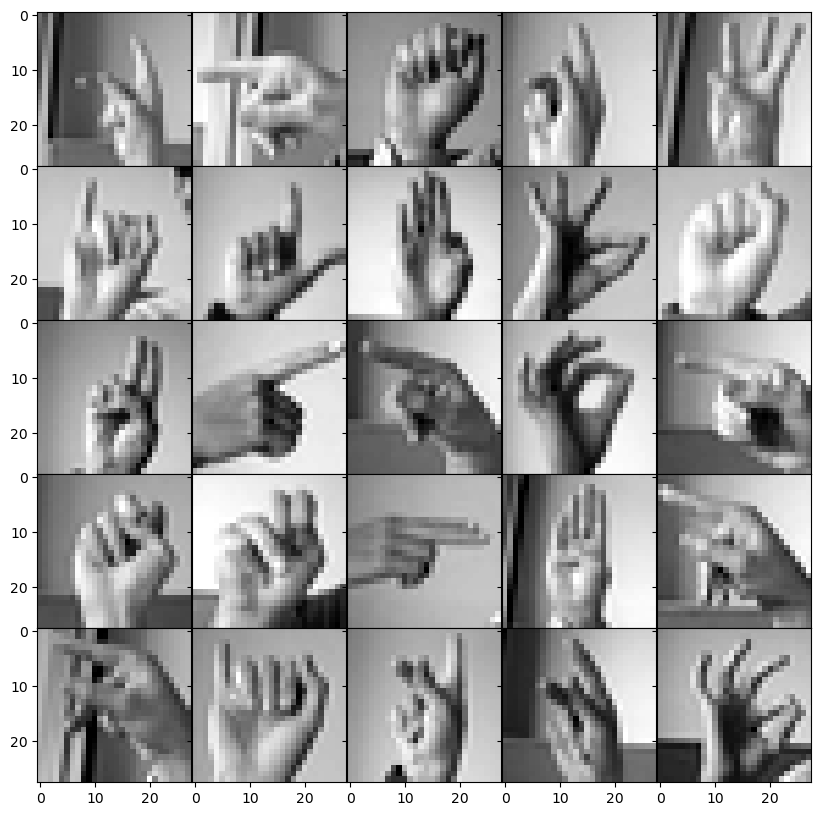

In [5]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 [==============================] - 5s 10ms/step - loss: 2.6243 - accuracy: 0.2009 - val_loss: 1.3988 - val_accuracy: 0.5686
Epoch 2/30
172/172 [==============================] - 1s 7ms/step - loss: 1.1066 - accuracy: 0.6293 - val_loss: 0.5807 - val_accuracy: 0.8314
Epoch 3/30
172/172 [==============================] - 1s 7ms/step - loss: 0.5932 - accuracy: 0.8021 - val_loss: 0.2920 - val_accuracy: 0.9255
Epoch 4/30
172/172 [==============================] - 1s 7ms/step - loss: 0.3688 - accuracy: 0.8761 - val_loss: 0.1654 - val_accuracy: 0.9612
Epoch 5/30
172/172 [==============================] - 1s 7ms/step - loss: 0.2477 - accuracy: 0.9192 - val_loss: 0.0894 - val_accuracy: 0.9869
Epoch 6/30
172/172 [==============================] - 1s 7ms/step - loss: 0.1702 - accuracy: 0.9485 - val_loss: 0.0475 - val_accuracy: 0.9956
Epoch 7/30
172/172 [==============================] - 1s 7ms/step - loss: 0.1262 - accuracy: 0.9618 - val_loss: 0.0257 - val_accuracy: 0.9985
Epoch

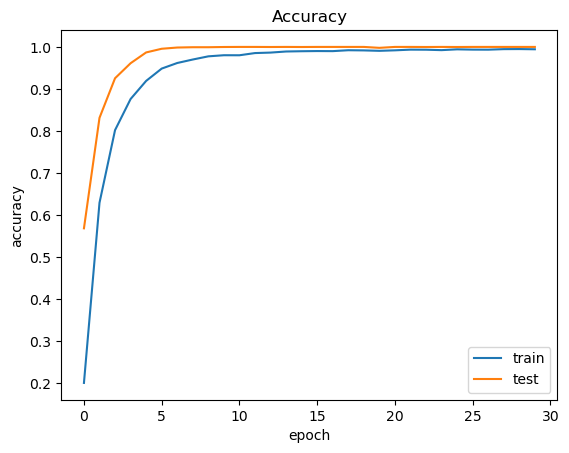

In [6]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [7]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(y_pred)
    print(accuracy)

225/225 [==============================] - 1s 2ms/step
[ 6  5 10 ...  2  4  2]
0.9339096486335751
